In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorboard
import os
import keras

base_dir = "D:\\Projects\\Tensorflow\\Study\\assets\\plantvillagedataset"
class_list = os.listdir(base_dir)
print(f"count class in this data is {len(class_list)}\n the class is {class_list}")
print(tf.__version__)

count class in this data is 13
 the class is ['Apple', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Orange', 'Pepper', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
2.17.0


In [3]:
IMAGE_DIMS = (128, 128)
BATCH_SIZE = 32
num_classes = len(class_list)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode = "nearest")

In [5]:
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=IMAGE_DIMS,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    shuffle=True,
                                                    subset="training")

Found 81047 images belonging to 13 classes.


In [6]:
val_generator=train_datagen.flow_from_directory(base_dir,
                                                target_size=IMAGE_DIMS,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical",
                                                shuffle=False,
                                                subset="validation")

Found 20256 images belonging to 13 classes.


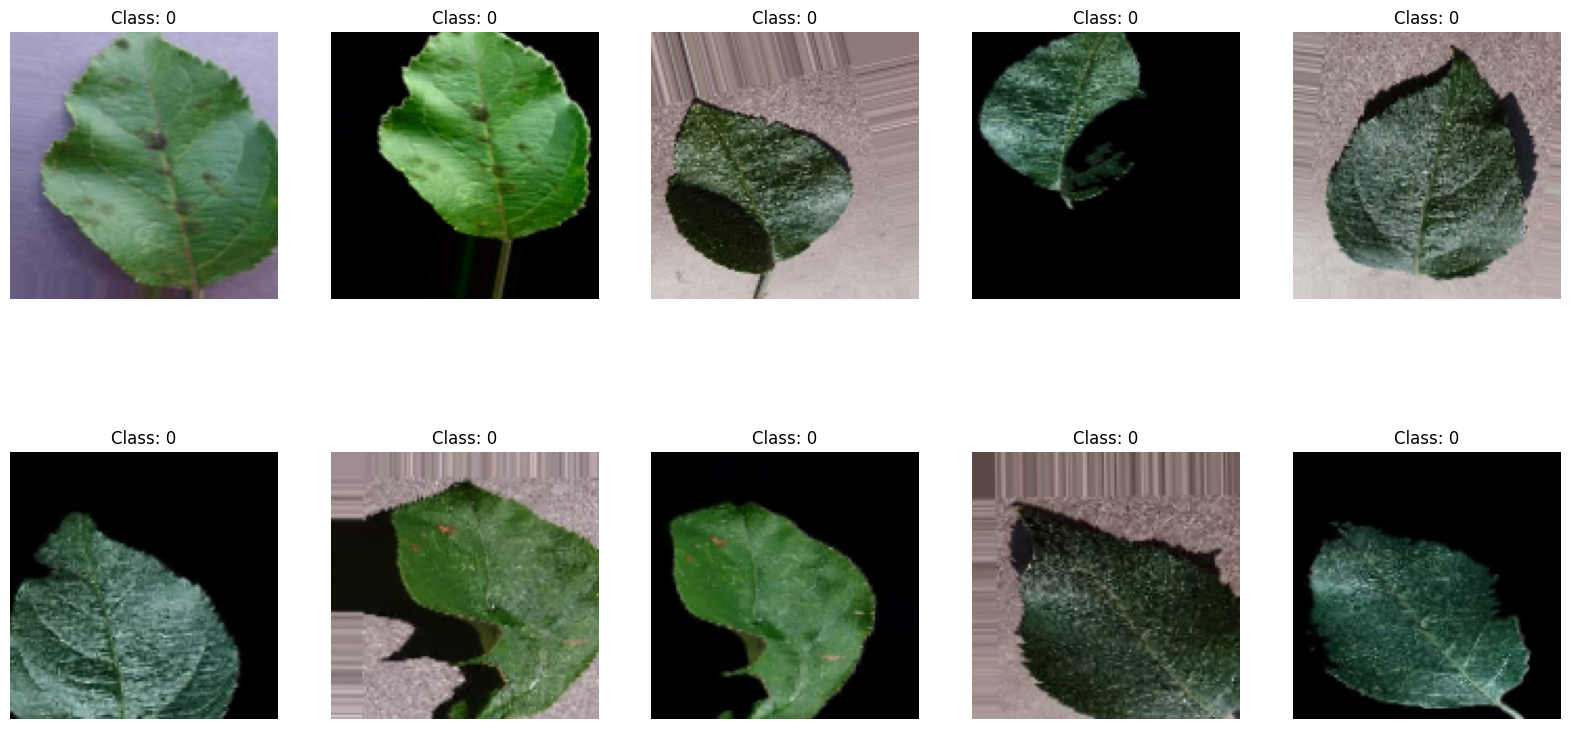

In [7]:
def show_images(generator):
    images, labels = next(generator)
    num_images = images.shape[0]
    plt.figure(figsize=(20, 10))
    for i in range(min(num_images, 10)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].astype('float32'))
        plt.title(f"Class: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

show_images(val_generator)

In [8]:

model = keras.models.Sequential([
    keras.layers.Input(shape=(IMAGE_DIMS[0],IMAGE_DIMS[1], 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,997 (28.21 MB)

 Trainable params: 7,393,997 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="assets/logs")
model_checkpoint = keras.callbacks.ModelCheckpoint("assets/LeafBestModel.keras",
                                                    save_best_only=True)

hist = model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator,
    callbacks=[tensorboard_callback, model_checkpoint]
)

C:\Users\chitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 1428s 563ms/step - accuracy: 0.6355 - loss: 1.1310 - val_accuracy: 0.8378 - val_loss: 0.4889
Epoch 2/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 1266s 500ms/step - accuracy: 0.8494 - loss: 0.4608 - val_accuracy: 0.8703 - val_loss: 0.4029
Epoch 3/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 772s 305ms/step - accuracy: 0.8942 - loss: 0.3243 - val_accuracy: 0.9010 - val_loss: 0.3068
Epoch 4/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 680s 268ms/step - accuracy: 0.9139 - loss: 0.2630 - val_accuracy: 0.9180 - val_loss: 0.2553
Epoch 5/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 660s 261ms/step - accuracy: 0.9262 - loss: 0.2257 - val_accuracy: 0.9299 - val_loss: 0.2096
Epoch 6/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 690s 272ms/step - accuracy: 0.9324 - loss: 0.2035 - val_accuracy: 0.9374 - val_loss: 0.1916
Epoch 7/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 657s 259ms/step - accuracy: 0.9386 - loss: 0.1888 - val_accuracy: 0.9445 - val_loss: 0.1706
Epoch 8/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 851s 336ms/step - accuracy

C:\Users\chitr\AppData\Local\Temp\ipykernel_23376\2474660016.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


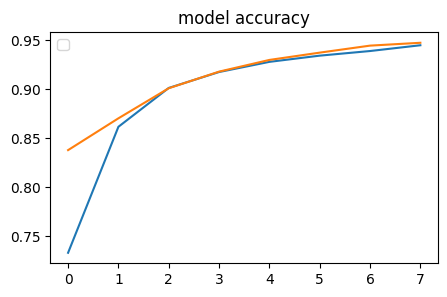

In [17]:
plt.figure(figsize=(5, 3))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('model accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


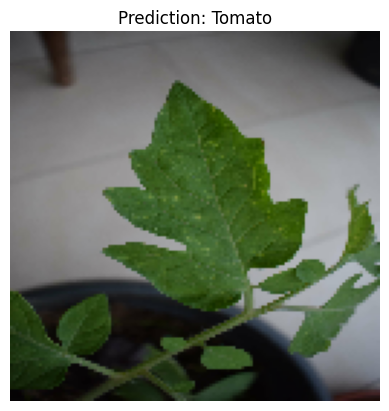

In [18]:
def load_and_prep_image(filename, img_shape=IMAGE_DIMS, scale=True):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [tf.reduce_mean(img_shape), tf.reduce_mean(img_shape)])
    if scale:
        return img/255.
    else:
        return img

def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, 0))

    pred_class = class_names[pred.argmax()]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

pred_and_plot(model, "d:\\Projects\\Tensorflow\\Projects\\Plant Leaf Classification\\assets\\tomato.jpg", class_list)

In [19]:
model_1 = keras.models.load_model("assets/LeafBestModel.keras")
hist1 = model_1.evaluate(val_generator)

633/633 ━━━━━━━━━━━━━━━━━━━━ 83s 131ms/step - accuracy: 0.9454 - loss: 0.1702


In [ ]:
from keras.applications import EfficientNetV2B0
efficientnet_model = EfficientNetV2B0(include_top=False,
                                        input_shape=(IMAGE_DIMS[0], IMAGE_DIMS[1], 3))

model_2 = keras.models.Sequential([
    efficientnet_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(num_classes, activation='softmax')
])

model_2.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
hist2 = model_2.fit(train_generator,
                    epochs=8)
hist2 = model_2.evaluate(val_generator)

In [21]:
from keras.applications import ResNet50V2

resnet_model = ResNet50V2(include_top=False,
                            input_shape=(IMAGE_DIMS[0], IMAGE_DIMS[1], 3))

model_3 = keras.models.Sequential([
    resnet_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(num_classes, activation='softmax')
])

model_3.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

hist3 = model_3.fit(train_generator,
                    callbacks=[tensorboard_callback],
                    validation_data=val_generator,
                    epochs=8)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 107s 1us/step
Epoch 1/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4265s 2s/step - accuracy: 0.8449 - loss: 0.5036 - val_accuracy: 0.7572 - val_loss: 0.9646
Epoch 2/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4069s 2s/step - accuracy: 0.9544 - loss: 0.1428 - val_accuracy: 0.9320 - val_loss: 0.2116
Epoch 3/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 3685s 1s/step - accuracy: 0.9665 - loss: 0.1015 - val_accuracy: 0.9071 - val_loss: 0.3180
Epoch 4/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 3667s 1s/step - accuracy: 0.9723 - loss: 0.0828 - val_accuracy: 0.9176 - val_loss: 0.2735
Epoch 5/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 3786s 1s/step - accuracy: 0.9783 - loss: 0.0658 - val_accuracy: 0.9330 - val_loss: 0.2199
Epoch 6/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 3721s 1s/step - accuracy: 0.9808 - loss: 0.0572 - val_accuracy: 0.9421 - val_loss: 0.2150
Epoch 7/8
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4030s 2s/step - accuracy: 0.9829 - loss: 0.0501 - val_accuracy: 0.9427 - val_loss: 0.1818
Epoch 8/8
2533/2533 ━━━━━━━━━━

In [10]:
train_finetune_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=(224, 224),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    shuffle=True,
                                                    subset="training")

Found 81047 images belonging to 13 classes.


In [11]:
val_finetune_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=(224, 224),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode = "categorical",
                                                    shuffle=True,
                                                    subset="validation")

Found 20256 images belonging to 13 classes.


In [ ]:
from keras.applications import ResNet50V2

tensorboard_callback = keras.callbacks.TensorBoard(log_dir="assets/logs")
model_checkpoint = keras.callbacks.ModelCheckpoint("assets/LeafBestModel.keras",
                                                    save_best_only=True)

res_fine_tune = ResNet50V2(include_top=True,
                            input_shape=(224, 224, 3))

for layer in res_fine_tune.layers[:-10]:
    layer.trainable = True

model_4 = keras.models.Sequential([
    res_fine_tune,
    keras.layers.Dense(num_classes, activation='softmax')
])

model_4.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

hist4 = model_4.fit(train_finetune_generator,
                    validation_data=val_finetune_generator,
                    callbacks=[tensorboard_callback],
                    epochs=8)

In [ ]:
from keras.applications import EfficientNetV2B0

eff_fine_tune = EfficientNetV2B0(include_top=True,
                                    input_shape=(IMAGE_DIMS[0], IMAGE_DIMS[1], 3))

for layer in eff_fine_tune.layers[:-10]:
    layer.trainable = True

model_5 = keras.models.Sequential([
    eff_fine_tune,
    keras.layers.Dense(num_classes, activation='softmax')
])

model_5.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

hist5 = model_5.fit(train_finetune_generator,
                    validation_data=val_finetune_generator,
                    callbacks=[tensorboard_callback],
                    epochs=8)